# UAS Data Mining
**Nama Kelompok:**

1. Reksi Hendra Pratama ( G1A022032)
2. Baim Mudrik Aziz (G1A022071)



## Import Library

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Unduh file dari Google Drive
import gdown

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan dan pembagian data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluasi model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Penyimpanan model
import joblib


## Data Understanding

###2.1 Data Loading

In [2]:
# ID file dari link Google Drive
file_id = "1kjRfgWkgo8BP_BGlkAK3FBJ-OsbTK13x"
output_filename = "dataset_mahasiswa_DO_4000_mahasiswa.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kjRfgWkgo8BP_BGlkAK3FBJ-OsbTK13x
To: /content/dataset_mahasiswa_DO_4000_mahasiswa.csv
100%|██████████| 310k/310k [00:00<00:00, 69.9MB/s]


'dataset_mahasiswa_DO_4000_mahasiswa.csv'

In [3]:
# Baca dataset
df = pd.read_csv('dataset_mahasiswa_DO_4000_mahasiswa.csv')

###2.2 EDA (Exploratory Data Analysis)

In [4]:
df

,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Status_Pekerjaan,Beban_Kerja_JamPerMinggu,Status_Ekonomi,Status_Risiko_DO
0,G1A0220000,2.01,2.10,2.05,2.08,2.00,2.17,89.84,1,65.50,Tidak Bekerja,0,Tinggi,0
1,G1A0220001,3.27,3.15,3.40,3.13,3.35,3.39,83.69,1,82.59,Bekerja,33,Menengah,0
2,G1A0220002,3.04,2.93,2.92,3.19,3.33,3.20,78.63,0,64.78,Tidak Bekerja,0,Tinggi,0
3,G1A0220003,2.00,2.22,2.11,2.20,2.00,2.36,82.09,1,74.19,Bekerja,23,Rendah,0
4,G1A0220004,3.58,3.35,3.52,3.39,3.15,3.28,76.21,1,63.18,Tidak Bekerja,0,Tinggi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,G1A02233620,2.28,2.23,2.00,2.22,2.20,2.08,84.06,3,79.99,Bekerja,35,Menengah,1
3996,G1A02233634,2.00,2.00,2.00,2.19,2.00,2.08,81.40,0,34.99,Bekerja,36,Rendah,1
3997,G1A02233635,2.18,2.02,2.12,2.04,2.06,2.12,85.13,0,32.80,Bekerja,38,Rendah,1
3998,G1A02233708,2.40,2.34,2.52,2.29,2.44,2.38,84.81,3,54.96,Bekerja,11,Rendah,1


In [5]:
# Tampilkan ringkasan
print("Jumlah data:", len(df))


Jumlah data: 4000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NIM                                   4000 non-null   object 
 1   IPK_Semester_1                        4000 non-null   float64
 2   IPK_Semester_2                        4000 non-null   float64
 3   IPK_Semester_3                        4000 non-null   float64
 4   IPK_Semester_4                        4000 non-null   float64
 5   IPK_Semester_5                        4000 non-null   float64
 6   IPK_Semester_6                        4000 non-null   float64
 7   Kehadiran_Per_Mata_Kuliah             4000 non-null   float64
 8   Riwayat_Pengambilan_Ulang             4000 non-null   int64  
 9   Aktivitas_Sistem_Pembelajaran_Daring  4000 non-null   float64
 10  Status_Pekerjaan                      4000 non-null   object 
 11  Beban_Kerja_JamPe

In [7]:
df.describe()

,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Beban_Kerja_JamPerMinggu,Status_Risiko_DO
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.742025,2.739830,2.742998,2.747267,2.750323,2.750223,83.077375,1.694500,58.014715,14.054500,0.450000
std,0.519163,0.515468,0.516601,0.526832,0.523046,0.530943,7.889300,1.305793,20.262292,14.804487,0.497556
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,2.260000,2.270000,2.270000,2.270000,2.280000,2.280000,76.177500,1.000000,42.715000,0.000000,0.000000
50%,2.710000,2.700000,2.690000,2.690000,2.680000,2.680000,83.590000,1.000000,58.275000,11.000000,0.000000
75%,3.210000,3.202500,3.210000,3.212500,3.200000,3.202500,88.962500,3.000000,72.420000,29.000000,1.000000
max,3.960000,4.000000,4.000000,4.000000,4.000000,4.000000,100.000000,4.000000,100.000000,40.000000,1.000000


In [8]:
df.shape

(4000, 14)

###2.3 Cek Kelengkapan Data

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.Status_Risiko_DO.value_counts(normalize=True)

,proportion
Status_Risiko_DO,
0,0.55
1,0.45


In [11]:
df.isnull().sum()

,0
NIM,0
IPK_Semester_1,0
IPK_Semester_2,0
IPK_Semester_3,0
IPK_Semester_4,0
IPK_Semester_5,0
IPK_Semester_6,0
Kehadiran_Per_Mata_Kuliah,0
Riwayat_Pengambilan_Ulang,0
Aktivitas_Sistem_Pembelajaran_Daring,0


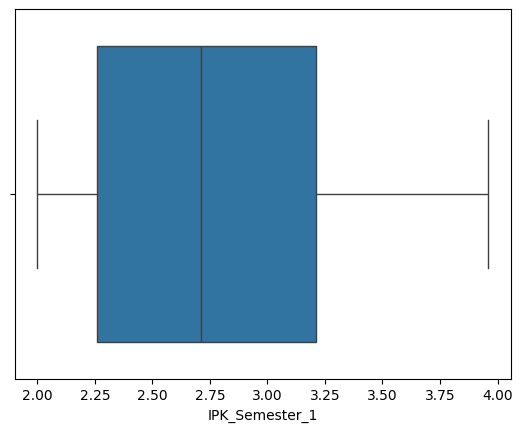

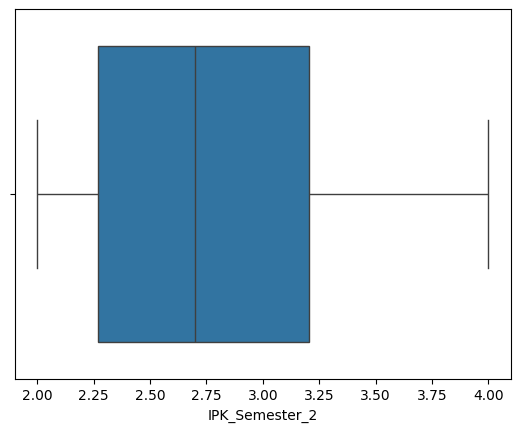

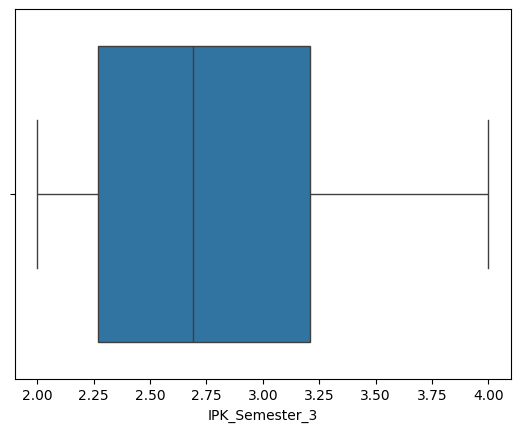

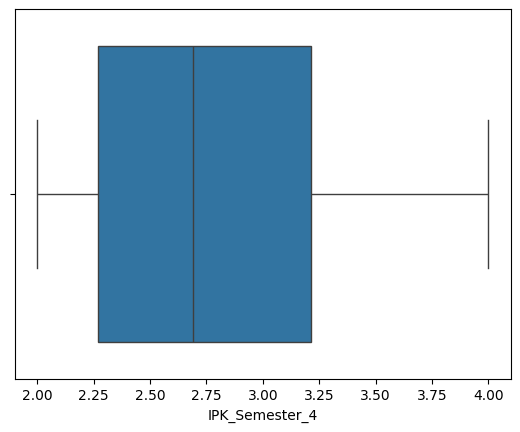

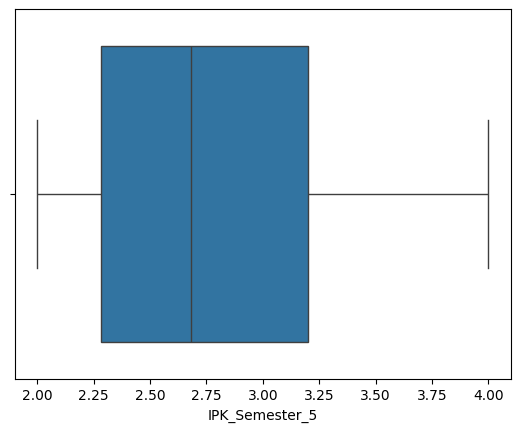

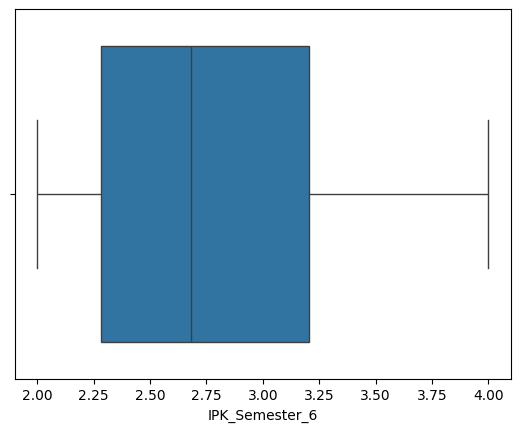

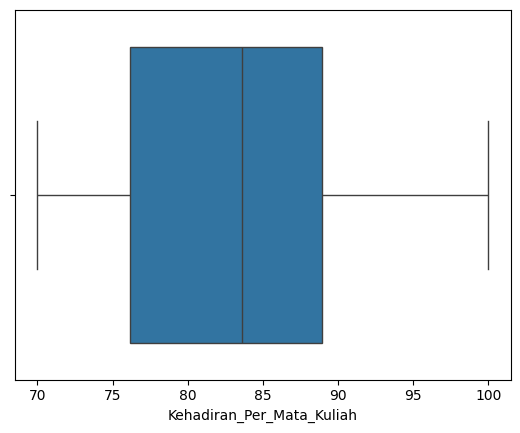

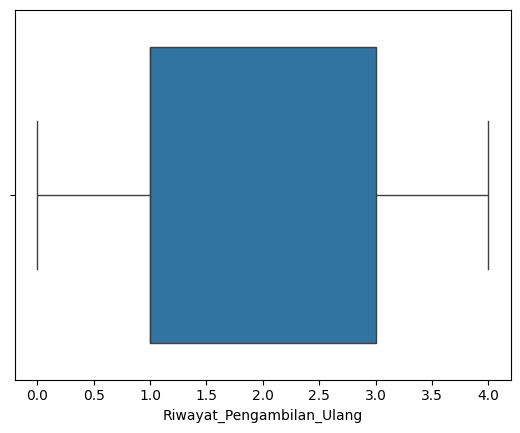

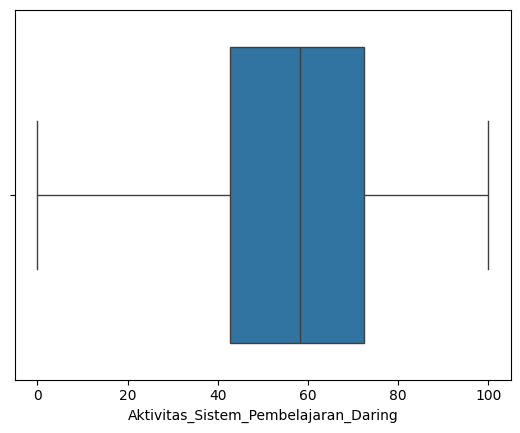

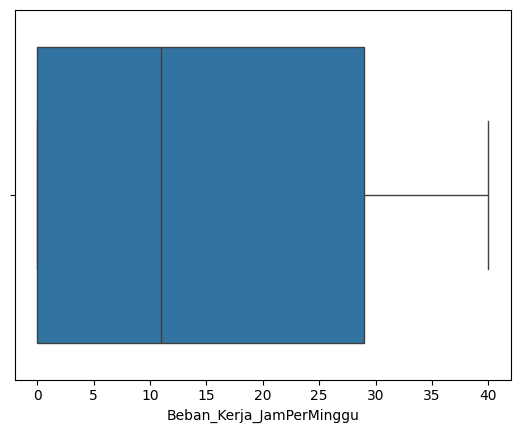

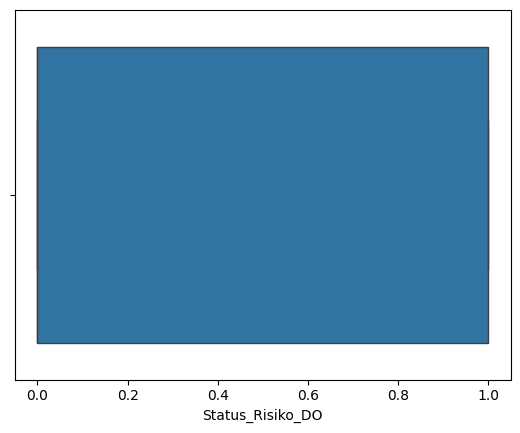

In [12]:
# Visualisasi Outlier
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

Tidak ada outlier yang terdeteksi

###2.4 Univariate Analysis

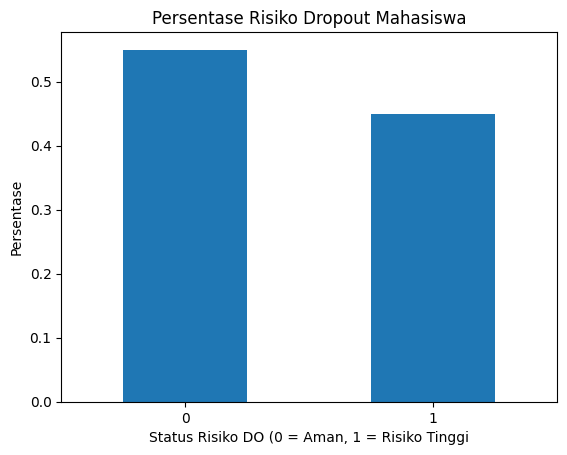

In [13]:
# Calculate the percentage distribution of dropout risk status
dropout_risk_counts = df['Status_Risiko_DO'].value_counts(normalize=True)

# Create a bar chart
dropout_risk_counts.plot(kind='bar')
plt.title('Persentase Risiko Dropout Mahasiswa')
plt.xlabel('Status Risiko DO (0 = Aman, 1 = Risiko Tinggi')
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.show()

Frekuensi dan Persentase untuk Status Pekerjaan:
                  Jumlah  Persentase (%)
Status_Pekerjaan                        
Bekerja             2121          53.025
Tidak Bekerja       1879          46.975




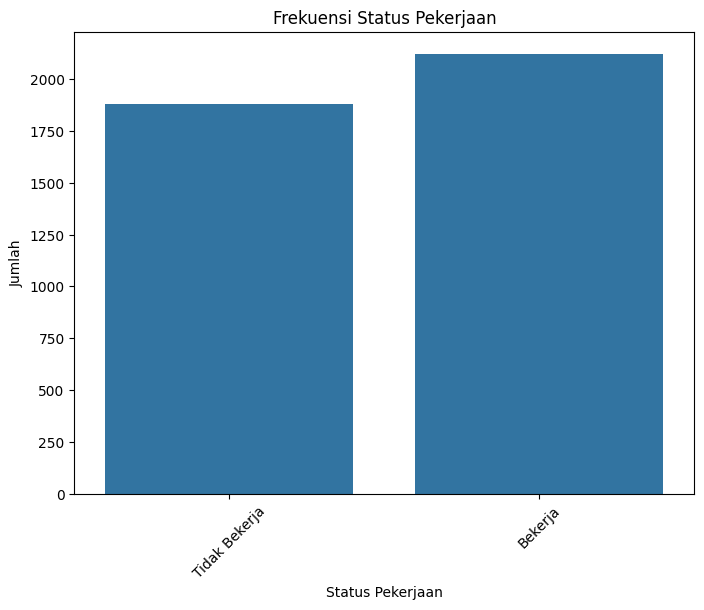

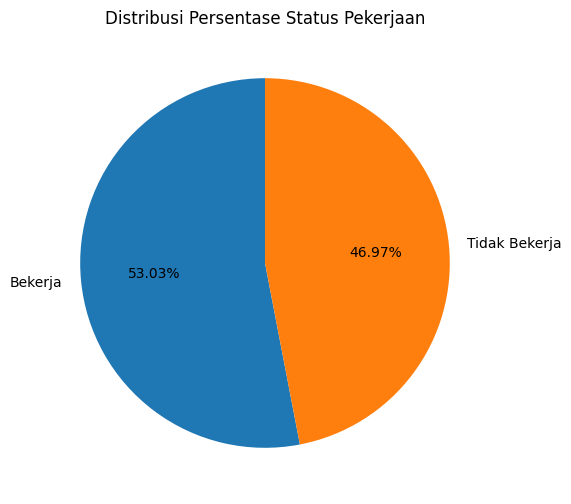

In [14]:
# Menghitung frekuensi dan persentase untuk Status_Pekerjaan
print("Frekuensi dan Persentase untuk Status Pekerjaan:")
status_pekerjaan_counts = df['Status_Pekerjaan'].value_counts()
status_pekerjaan_percent = df['Status_Pekerjaan'].value_counts(normalize=True) * 100
print(pd.DataFrame({
    'Jumlah': status_pekerjaan_counts,
    'Persentase (%)': status_pekerjaan_percent
}))
print("\n")

# --- Diagram Batang ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Status_Pekerjaan', data=df)
plt.title('Frekuensi Status Pekerjaan')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# --- Diagram Lingkaran ---
plt.figure(figsize=(8, 6))
df['Status_Pekerjaan'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Distribusi Persentase Status Pekerjaan')
plt.ylabel('')  # Menghilangkan label y untuk tampilan lebih rapi
plt.show()

Frekuensi dan Persentase untuk Status Ekonomi:
                Jumlah  Persentase (%)
Status_Ekonomi                        
Menengah          1779          44.475
Rendah            1593          39.825
Tinggi             628          15.700




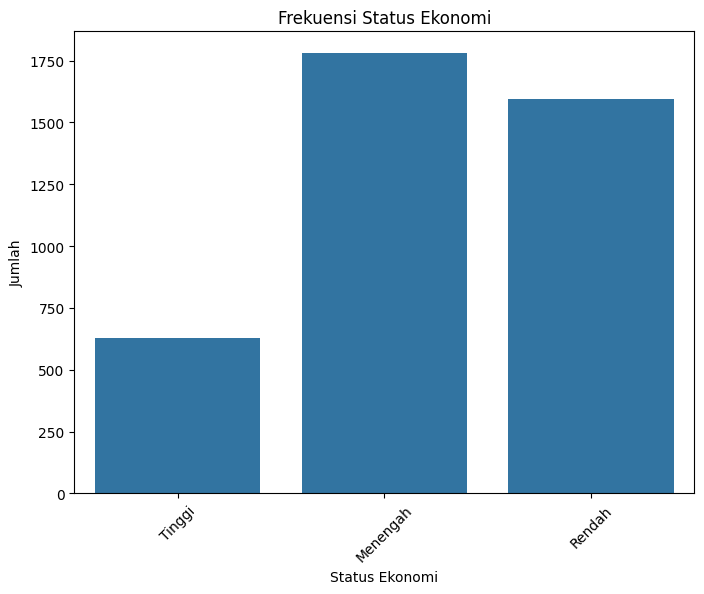

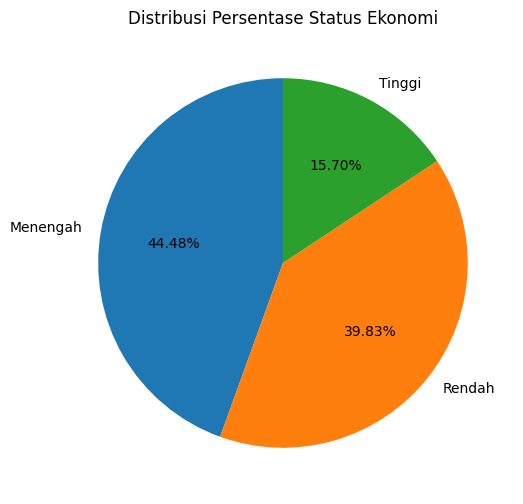

In [15]:
# Menghitung frekuensi dan persentase untuk Status_Ekonomi
print("Frekuensi dan Persentase untuk Status Ekonomi:")
status_ekonomi_counts = df['Status_Ekonomi'].value_counts()
status_ekonomi_percent = df['Status_Ekonomi'].value_counts(normalize=True) * 100
print(pd.DataFrame({
    'Jumlah': status_ekonomi_counts,
    'Persentase (%)': status_ekonomi_percent
}))
print("\n")

# --- Diagram Batang ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Status_Ekonomi', data=df)
plt.title('Frekuensi Status Ekonomi')
plt.xlabel('Status Ekonomi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# --- Diagram Lingkaran ---
plt.figure(figsize=(8, 6))
df['Status_Ekonomi'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Distribusi Persentase Status Ekonomi')
plt.ylabel('')  # Menghilangkan label y untuk tampilan lebih rapi
plt.show()

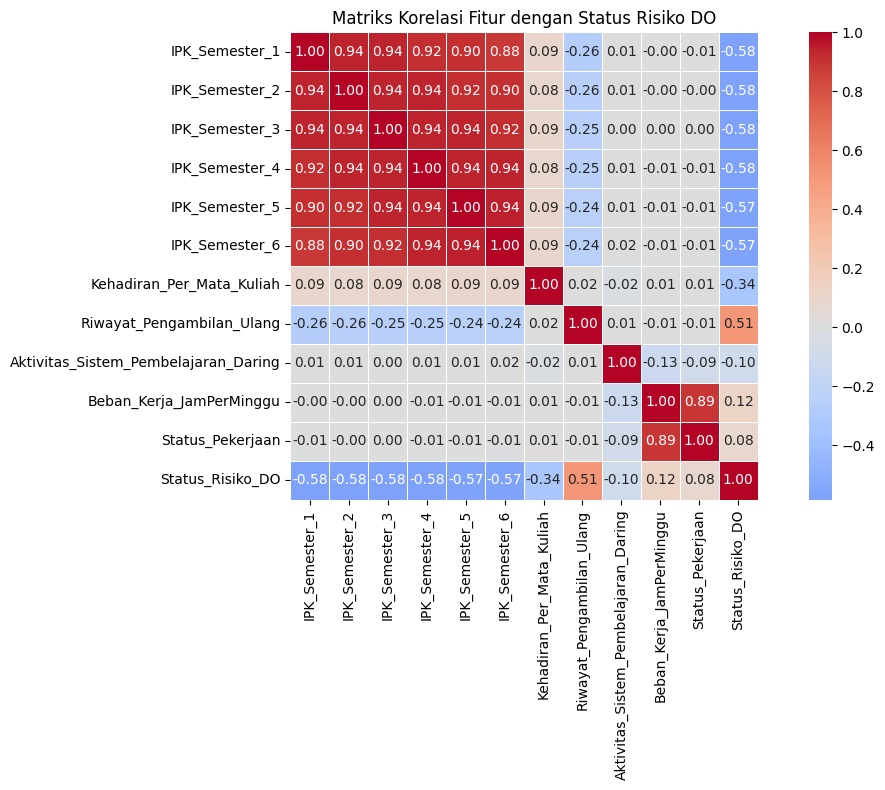


Korelasi Fitur dengan Target (Status_Risiko_DO):
Status_Risiko_DO                        1.000000
Riwayat_Pengambilan_Ulang               0.514554
Beban_Kerja_JamPerMinggu                0.118441
Status_Pekerjaan                        0.078084
Aktivitas_Sistem_Pembelajaran_Daring   -0.095291
Kehadiran_Per_Mata_Kuliah              -0.336078
IPK_Semester_6                         -0.571803
IPK_Semester_5                         -0.572788
IPK_Semester_4                         -0.581321
IPK_Semester_1                         -0.581684
IPK_Semester_3                         -0.582341
IPK_Semester_2                         -0.584098
Name: Status_Risiko_DO, dtype: float64


In [30]:
# --- Daftar Kolom Numerik + Label Encoded ---
numerical_cols = [
    'IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3',
    'IPK_Semester_4', 'IPK_Semester_5', 'IPK_Semester_6',
    'Kehadiran_Per_Mata_Kuliah', 'Riwayat_Pengambilan_Ulang',
    'Aktivitas_Sistem_Pembelajaran_Daring', 'Beban_Kerja_JamPerMinggu',
    'Status_Pekerjaan', 'Status_Risiko_DO'  # encoded kategorikal
]

# --- Hitung Korelasi Pearson ---
correlation_matrix = df_encoded[numerical_cols].corr(method='pearson')

# --- Visualisasi Heatmap Korelasi ---
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, square=True)
plt.title('Matriks Korelasi Fitur dengan Status Risiko DO')
plt.tight_layout()
plt.show()

# --- Korelasi terhadap Target (Status_Risiko_DO) ---
print("\nKorelasi Fitur dengan Target (Status_Risiko_DO):")
print(correlation_matrix['Status_Risiko_DO'].sort_values(ascending=False))


## Data Preparation

###3.1 Data Cleaning

In [19]:
# Kolom yang akan dihapus (dianggap tidak relevan untuk pemodelan)
kolom_tidak_relevan = ['NIM']

# Menghapus kolom yang tidak relevan dari DataFrame
df_model = df.drop(columns=kolom_tidak_relevan)


In [20]:
# Kolom yang Tersisa
# Tampilkan kolom yang tersisa di df_model
print("Kolom yang tersisa di DataFrame setelah menghapus 'NIM':")
print(df_model.columns)

Kolom yang tersisa di DataFrame setelah menghapus 'NIM':
Index(['IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3', 'IPK_Semester_4',
       'IPK_Semester_5', 'IPK_Semester_6', 'Kehadiran_Per_Mata_Kuliah',
       'Riwayat_Pengambilan_Ulang', 'Aktivitas_Sistem_Pembelajaran_Daring',
       'Status_Pekerjaan', 'Beban_Kerja_JamPerMinggu', 'Status_Ekonomi',
       'Status_Risiko_DO'],
      dtype='object')


In [21]:
# Memisahkan fitur (X) dari variabel target (y)
fitur = df_model.loc[:, df_model.columns != 'Status_Risiko_DO']

# Target (y) akan berisi kolom 'Churn'
target = df_model['Status_Risiko_DO']

# Menampilkan dimensi dari fitur dan target yang baru
print("Dimensi Fitur (X):", fitur.shape)
print("Dimensi Target (y):", target.shape)

Dimensi Fitur (X): (4000, 12)
Dimensi Target (y): (4000,)


In [22]:

# Cek missing values pada DataFrame yang sudah diolah (df_model)
print("\nJumlah missing values per kolom di df_model:")
print(df_model.isnull().sum())

# Menghapus baris yang mengandung missing values (handle missing values by dropping)
df_cleaned = df_model.dropna()

# Cek kembali missing values setelah dibersihkan
print("\nJumlah missing values per kolom setelah penghapusan baris:")
df_cleaned.isnull().sum()




Jumlah missing values per kolom di df_model:
IPK_Semester_1                          0
IPK_Semester_2                          0
IPK_Semester_3                          0
IPK_Semester_4                          0
IPK_Semester_5                          0
IPK_Semester_6                          0
Kehadiran_Per_Mata_Kuliah               0
Riwayat_Pengambilan_Ulang               0
Aktivitas_Sistem_Pembelajaran_Daring    0
Status_Pekerjaan                        0
Beban_Kerja_JamPerMinggu                0
Status_Ekonomi                          0
Status_Risiko_DO                        0
dtype: int64

Jumlah missing values per kolom setelah penghapusan baris:


,0
IPK_Semester_1,0
IPK_Semester_2,0
IPK_Semester_3,0
IPK_Semester_4,0
IPK_Semester_5,0
IPK_Semester_6,0
Kehadiran_Per_Mata_Kuliah,0
Riwayat_Pengambilan_Ulang,0
Aktivitas_Sistem_Pembelajaran_Daring,0
Status_Pekerjaan,0


### 3.2 Train Test Split


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    fitur, target,
    test_size=0.2,
    random_state=42,
    stratify=target
)

total_data = len(fitur)
print(f"Jumlah total dataset: {total_data}")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah total dataset: 4000
Jumlah data latih: 3200
Jumlah data uji: 800


Data dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split`.  
- Jumlah total dataset: 588
- Jumlah data latih: 470
- Jumlah data uji: 118

###3.3 Encoding dan Normalisasi

In [25]:
# Mengelompokkan kolom menjadi numerik dan kategorikal
kolom_numerik = ['IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3',
                 'IPK_Semester_4', 'IPK_Semester_5', 'IPK_Semester_6',
                 'Kehadiran_Per_Mata_Kuliah', 'Riwayat_Pengambilan_Ulang',
                 'Aktivitas_Sistem_Pembelajaran_Daring', 'Beban_Kerja_JamPerMinggu']
kolom_kategorikal = ['Status_Pekerjaan', 'Status_Ekonomi']

print("Kolom Numerik:", kolom_numerik)
print("Kolom Kategorikal:", kolom_kategorikal)

Kolom Numerik: ['IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3', 'IPK_Semester_4', 'IPK_Semester_5', 'IPK_Semester_6', 'Kehadiran_Per_Mata_Kuliah', 'Riwayat_Pengambilan_Ulang', 'Aktivitas_Sistem_Pembelajaran_Daring', 'Beban_Kerja_JamPerMinggu']
Kolom Kategorikal: ['Status_Pekerjaan', 'Status_Ekonomi']


In [26]:
# Membuat salinan dataframe untuk analisis
df_encoded = df.copy()

# Mendefinisikan mapping khusus untuk Status_Pekerjaan
mapping_pekerjaan = {'Bekerja': 1, 'Tidak Bekerja': 0}

# Mendefinisikan mapping khusus untuk Status_Ekonomi
mapping_ekonomi = {'Rendah': 0, 'Menengah': 1, 'Tinggi': 2}

# Menerapkan mapping menggunakan fungsi replace
df_encoded['Status_Pekerjaan'] = df_encoded['Status_Pekerjaan'].replace(mapping_pekerjaan)
df_encoded['Status_Ekonomi'] = df_encoded['Status_Ekonomi'].replace(mapping_ekonomi)

# Menampilkan mapping yang digunakan
print("Pengkodean untuk Status_Pekerjaan:", mapping_pekerjaan)
print("Pengkodean untuk Status_Ekonomi:", mapping_ekonomi)

# Menampilkan beberapa baris untuk memverifikasi hasil
print("\nDataframe setelah Label Encoding (5 baris pertama):")
print(df_encoded[kolom_kategorikal].head())

Pengkodean untuk Status_Pekerjaan: {'Bekerja': 1, 'Tidak Bekerja': 0}
Pengkodean untuk Status_Ekonomi: {'Rendah': 0, 'Menengah': 1, 'Tinggi': 2}

Dataframe setelah Label Encoding (5 baris pertama):
   Status_Pekerjaan  Status_Ekonomi
0                 0               2
1                 1               1
2                 0               2
3                 1               0
4                 0               2


<ipython-input-26-d15e139c021a>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Status_Pekerjaan'] = df_encoded['Status_Pekerjaan'].replace(mapping_pekerjaan)
<ipython-input-26-d15e139c021a>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Status_Ekonomi'] = df_encoded['Status_Ekonomi'].replace(mapping_ekonomi)


In [27]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur numerik untuk data latih dan uji
X_train_num = scaler.fit_transform(X_train[kolom_numerik])
X_test_num = scaler.transform(X_test[kolom_numerik])

# Menampilkan beberapa baris data latih yang telah dinormalisasi
print("Contoh data latih setelah normalisasi (5 baris pertama):")
print(X_train_num[:5])

Contoh data latih setelah normalisasi (5 baris pertama):
[[0.18367347 0.295      0.24       0.1        0.22       0.195
  0.20966667 0.75       0.6158     0.        ]
 [0.84693878 0.785      0.89       0.64       0.72       0.705
  0.513      0.         0.6727     0.925     ]
 [0.41326531 0.46       0.445      0.285      0.315      0.22
  0.21166667 0.5        0.6393     0.65      ]
 [0.71938776 0.77       0.78       0.795      0.8        0.74
  0.78933333 0.5        0.6071     0.        ]
 [0.16326531 0.18       0.12       0.235      0.2        0.34
  0.07566667 0.25       0.5815     0.        ]]


In [36]:
# Mengambil fitur kategorikal yang telah diencode dari df_encoded
# Menggunakan indeks X_train dan X_test untuk menyelaraskan data
X_train_cat = df_encoded.loc[X_train.index, kolom_kategorikal].to_numpy()
X_test_cat = df_encoded.loc[X_test.index, kolom_kategorikal].to_numpy()

# Menampilkan beberapa baris untuk memverifikasi hasil
print("Contoh data latih kategorikal setelah encoding (5 baris pertama):")
print(X_train_cat[:5])
print("Contoh data uji kategorikal setelah encoding (5 baris pertama):")
print(X_test_cat[:5])

Contoh data latih kategorikal setelah encoding (5 baris pertama):
[[0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 2]]
Contoh data uji kategorikal setelah encoding (5 baris pertama):
[[0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [38]:
# Menggabungkan fitur numerik dan kategorikal yang telah diproses
X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

# Menampilkan bentuk data akhir
print("Bentuk X_train_final:", X_train_final.shape)
print("Bentuk X_test_final:", X_test_final.shape)

Bentuk X_train_final: (3200, 12)
Bentuk X_test_final: (800, 12)


## 4. Model Development

###4.1 Random Forest

In [39]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Model Random Forest telah diinisialisasi.")

Model Random Forest telah diinisialisasi.


In [40]:
# Melatih model Random Forest
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = rf_model.predict(X_test_final)

### 4.2 Logistic Regression

In [42]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
print("Model Logistic Regression telah diinisialisasi.")

Model Logistic Regression telah diinisialisasi.


In [43]:
# Melatih model Logistic Regression
lr_model.fit(X_train_final, y_train)

print("Pelatihan selesai untuk model Logistic Regression.")

Pelatihan selesai untuk model Logistic Regression.


In [44]:
# Memprediksi data uji dengan Logistic Regression
y_pred_lr = lr_model.predict(X_test_final)


## 5. Evaluasi Model

### 5.1 Random Forest

In [45]:
# Evaluasi model Random Forest
print("Evaluasi Model Random Forest:")

# Evaluasi
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Presisi:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))


Evaluasi Model Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       440
           1       0.99      0.97      0.98       360

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Akurasi: 0.9825
Presisi: 0.9859550561797753
Recall: 0.975
F1-Score: 0.9804469273743017


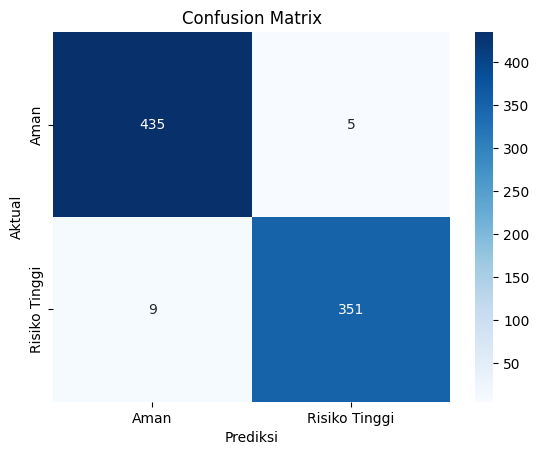

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Aman", "Risiko Tinggi"], yticklabels=["Aman", "Risiko Tinggi"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()



### 5.2 Logistic Regression

In [49]:
# Evaluasi model Logistic Regression

print("Evaluasi Model Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print("Presisi:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

Evaluasi Model Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       440
           1       0.89      0.88      0.88       360

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Akurasi: 0.89375
Presisi: 0.8873239436619719
Recall: 0.875
F1-Score: 0.8811188811188811


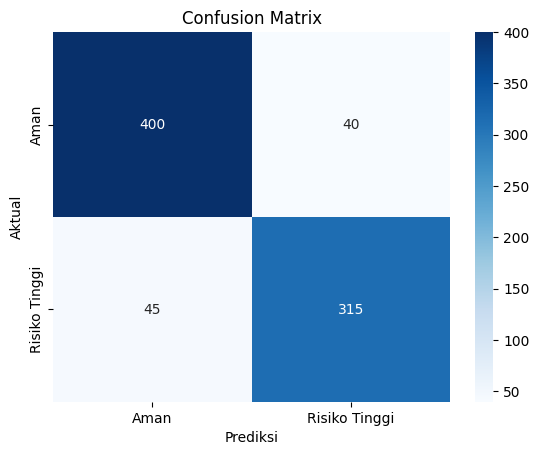

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Aman", "Risiko Tinggi"], yticklabels=["Aman", "Risiko Tinggi"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()



## 6. Simpan Model dan Inference Sederhana

In [51]:
joblib.dump(rf_model, 'model_prediksi_DO.pkl')

['model_prediksi_DO.pkl']

In [52]:
# Panduan rentang nilai untuk pengisian fitur
print("Panduan Rentang Pengisian Fitur:")
print("1. IPK_Semester_1 sampai IPK_Semester_6")
print("   - Rentang: 0.0 sampai 4.0")
print("   - Contoh: 3.5")
print("2. Kehadiran_Per_Mata_Kuliah")
print("   - Rentang: 0 sampai 100 (persentase kehadiran per mata kuliah)")
print("   - Contoh: 85")
print("3. Riwayat_Pengambilan_Ulang")
print("   - Rentang: 0 sampai jumlah mata kuliah yang diulang (bilangan bulat)")
print("   - Contoh: 2")
print("4. Aktivitas_Sistem_Pembelajaran_Daring")
print("   - Rentang: 0 sampai 100 (persentase aktivitas daring)")
print("   - Contoh: 70")
print("5. Beban_Kerja_JamPerMinggu")
print("   - Rentang: 0 sampai 168 (jam per minggu, maksimum 24 jam x 7 hari)")
print("   - Contoh: 20")
print("6. Status_Pekerjaan")
print("   - Pilihan: 1 (Bekerja), 0 (Tidak Bekerja)")
print("   - Contoh: 1")
print("7. Status_Ekonomi")
print("   - Pilihan: 0 (Rendah), 1 (Menengah), 2 (Tinggi)")
print("   - Contoh: 1")

Panduan Rentang Pengisian Fitur:
1. IPK_Semester_1 sampai IPK_Semester_6
   - Rentang: 0.0 sampai 4.0
   - Contoh: 3.5
2. Kehadiran_Per_Mata_Kuliah
   - Rentang: 0 sampai 100 (persentase kehadiran per mata kuliah)
   - Contoh: 85
3. Riwayat_Pengambilan_Ulang
   - Rentang: 0 sampai jumlah mata kuliah yang diulang (bilangan bulat)
   - Contoh: 2
4. Aktivitas_Sistem_Pembelajaran_Daring
   - Rentang: 0 sampai 100 (persentase aktivitas daring)
   - Contoh: 70
5. Beban_Kerja_JamPerMinggu
   - Rentang: 0 sampai 168 (jam per minggu, maksimum 24 jam x 7 hari)
   - Contoh: 20
6. Status_Pekerjaan
   - Pilihan: 1 (Bekerja), 0 (Tidak Bekerja)
   - Contoh: 1
7. Status_Ekonomi
   - Pilihan: 0 (Rendah), 1 (Menengah), 2 (Tinggi)
   - Contoh: 1


In [53]:
# Memuat model Random Forest yang telah disimpan, alasannya karena lebih bagus dibanding Logistic Regression
rf_model = joblib.load('model_prediksi_DO.pkl')
print("Model Random Forest telah dimuat dari 'model_prediksi_DO.pkl'")

Model Random Forest telah dimuat dari 'model_prediksi_DO.pkl'


In [54]:
# Daftar fitur yang diperlukan
fitur = ['IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3',
         'IPK_Semester_4', 'IPK_Semester_5', 'IPK_Semester_6',
         'Kehadiran_Per_Mata_Kuliah', 'Riwayat_Pengambilan_Ulang',
         'Aktivitas_Sistem_Pembelajaran_Daring', 'Beban_Kerja_JamPerMinggu',
         'Status_Pekerjaan', 'Status_Ekonomi']

# Mengumpulkan input dari pengguna
input_data = []
for f in fitur:
    while True:
        try:
            nilai = float(input(f"Masukkan nilai untuk {f}: "))
            if f in ['IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3',
                     'IPK_Semester_4', 'IPK_Semester_5', 'IPK_Semester_6']:
                if not (0.0 <= nilai <= 4.0):
                    print("Nilai harus antara 0.0 dan 4.0!")
                    continue
            elif f == 'Kehadiran_Per_Mata_Kuliah' or f == 'Aktivitas_Sistem_Pembelajaran_Daring':
                if not (0 <= nilai <= 100):
                    print("Nilai harus antara 0 dan 100!")
                    continue
            elif f == 'Riwayat_Pengambilan_Ulang':
                if not (nilai >= 0 and nilai == int(nilai)):
                    print("Nilai harus bilangan bulat positif!")
                    continue
            elif f == 'Beban_Kerja_JamPerMinggu':
                if not (0 <= nilai <= 168):
                    print("Nilai harus antara 0 dan 168!")
                    continue
            elif f == 'Status_Pekerjaan':
                if not (nilai in [0, 1]):
                    print("Nilai harus 0 (Tidak Bekerja) atau 1 (Bekerja)!")
                    continue
            elif f == 'Status_Ekonomi':
                if not (nilai in [0, 1, 2]):
                    print("Nilai harus 0 (Rendah), 1 (Menengah), atau 2 (Tinggi)!")
                    continue
            input_data.append(nilai)
            break
        except ValueError:
            print("Input harus berupa angka! Silakan coba lagi.")

print("\nData yang dimasukkan:", input_data)

Masukkan nilai untuk IPK_Semester_1: 3.8
Masukkan nilai untuk IPK_Semester_2: 3.5
Masukkan nilai untuk IPK_Semester_3: 3.3
Masukkan nilai untuk IPK_Semester_4: 3.1
Masukkan nilai untuk IPK_Semester_5: 3.1
Masukkan nilai untuk IPK_Semester_6: 3.05
Masukkan nilai untuk Kehadiran_Per_Mata_Kuliah: 70
Masukkan nilai untuk Riwayat_Pengambilan_Ulang: 4
Masukkan nilai untuk Aktivitas_Sistem_Pembelajaran_Daring: 70
Masukkan nilai untuk Beban_Kerja_JamPerMinggu: 60
Masukkan nilai untuk Status_Pekerjaan: 1
Masukkan nilai untuk Status_Ekonomi: 0

Data yang dimasukkan: [3.8, 3.5, 3.3, 3.1, 3.1, 3.05, 70.0, 4.0, 70.0, 60.0, 1.0, 0.0]


In [56]:
# Daftar kolom numerik untuk normalisasi
kolom_numerik = ['IPK_Semester_1', 'IPK_Semester_2', 'IPK_Semester_3',
                 'IPK_Semester_4', 'IPK_Semester_5', 'IPK_Semester_6',
                 'Kehadiran_Per_Mata_Kuliah', 'Riwayat_Pengambilan_Ulang',
                 'Aktivitas_Sistem_Pembelajaran_Daring', 'Beban_Kerja_JamPerMinggu']
kolom_kategorikal = ['Status_Pekerjaan', 'Status_Ekonomi']

# Memisahkan fitur numerik dan kategorikal dari input
input_num = np.array(input_data[:10]).reshape(1, -1)  # Fitur numerik
input_cat = np.array(input_data[10:]).reshape(1, -1)  # Fitur kategorikal

# Normalisasi fitur numerik
scaler = MinMaxScaler()
scaler.fit(X_train[kolom_numerik])  # Asumsikan X_train dari pelatihan sebelumnya
input_num_scaled = scaler.transform(input_num)

# Menggabungkan fitur numerik yang dinormalisasi dan kategorikal
input_final = np.hstack((input_num_scaled, input_cat))



In [57]:
# Melakukan prediksi
prediksi = rf_model.predict(input_final)
probabilitas = rf_model.predict_proba(input_final)

# Menampilkan hasil
print("\nHasil Prediksi Risiko Dropout:")
print("Prediksi:", "Risiko Tinggi" if prediksi[0] == 1 else "Aman")
print("Probabilitas (Aman, Risiko Tinggi):", probabilitas[0])


Hasil Prediksi Risiko Dropout:
Prediksi: Risiko Tinggi
Probabilitas (Aman, Risiko Tinggi): [0.14 0.86]


In [61]:
!pip freeze > requirements.txt
print("requirements.txt file generated.")

requirements.txt file generated.
